# **Holiday Package Prediction**

---
## **Context**
---

**"Trips & Travel.com"** company wants to enable and establish a viable business model to expand the customer base. Currently, the company offers five types of packages: Basic, Standard, Deluxe, Super Deluxe, and King. *Last year's data found that 18% of customers purchased these packages. However, the marketing costs were high due to random customer outreach without utilizing available information.* The company now plans to launch a new product: the Wellness Tourism Package. Wellness Tourism involves travel that helps maintain, enhance, or start a healthy lifestyle, boosting one's overall well-being. *This time, the company intends to use existing data on current and potential customers to optimize marketing expenses efficiently.*

Based on this, we can determine the goals, objectives, and key metrics for this project:

**Goals:**
- Increase the customer purchase rate
- Reduce marketing costs

**Objective:**
- Utilize available data to target potential customers more effectively.
- Optimize marketing strategies to ensure cost-efficiency and higher conversion rates.

**Key Metrics**
- Customer purchase rate: Measure the percentage increase in package purchases.
- Return on investment (ROI): Assess the financial returns from the new Wellness Tourism Package and overall marketing efforts.


---
## **Data Understanding**
---

The dataset used in this analysis is sourced from Kaggle, titled [Holiday Package Prediction](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction). It contains 4888 rows and 20 columns. The dataset includes the following columns:

1. **CustomerID**: Unique identifier for each customer.
2. **ProdTaken**: Indicates whether the product was taken (True/False).
3. **Age**: Age of customer.
4. **TypeofContact**: How customer was contacted (Company Invited or Self Inquiry).
5. **CityTier**: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered.
6. **DurationOfPitch**: Duration of the pitch by a salesperson to the customer.
7. **Occupation**: Occupation of customer.
8. **Gender**: Gender of customer.
9. **NumberOfPersonVisiting**: Total number of persons planning to take the trip with the customer.
10. **NumberOfFollowups**: Total number of follow-ups has been done by the salesperson after the sales pitch.
11. **ProductPitched**: Product pitched by the salesperson.
12. **PreferredPropertyStar**: Preferred hotel property rating by customer.
13. **MaritalStatus**: Marital status of customer.
14. **NumberOfTrips**: Average number of trips in a year by customer.
15. **Passport**: Indicates if the customer has a passport (0: No, 1: Yes).
16. **PitchSatisfactionScore**: Satisfaction score of the sales pitch.
17. **OwnCar**: Indicates if the customer owns a car (0: No, 1: Yes).
18. **NumberOfChildrenVisiting**: Total number of children with age less than 5 planning to take the trip with the customer.
19. **Designation**: Job title of the customer in their current organization.
20. **MonthlyIncome**: Gross monthly income of the customer.

---
## **Import Library**
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")

---
## **Setting Visualization**
---

In [2]:
plt.rcParams["font.family"] = "cursive"
sns.set(rc={'axes.facecolor':'#E5E7E9', 'figure.facecolor':'#F4F6F6'})
custom_colors = ['#1ABC9C', '#E74C3C', '#3498DB', '#F1C40F', '#9B59B6','#99A3A4', '#16A085', '#C0392B', '#2980B9', '#F39C12', '#8E44AD', '#5D6D7E']
sns.set_palette(sns.color_palette(custom_colors))
colors = sns.color_palette(custom_colors)
colors

[(0.10196078431372549, 0.7372549019607844, 0.611764705882353),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.9450980392156862, 0.7686274509803922, 0.058823529411764705),
 (0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 (0.6, 0.6392156862745098, 0.6431372549019608),
 (0.08627450980392157, 0.6274509803921569, 0.5215686274509804),
 (0.7529411764705882, 0.2235294117647059, 0.16862745098039217),
 (0.1607843137254902, 0.5019607843137255, 0.7254901960784313),
 (0.9529411764705882, 0.611764705882353, 0.07058823529411765),
 (0.5568627450980392, 0.26666666666666666, 0.6784313725490196),
 (0.36470588235294116, 0.42745098039215684, 0.49411764705882355)]

---
## **Read Dataset**
---

In [3]:
df = pd.read_csv('Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


---
## **EDA**
---

### Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Based on the dataset information, we can infer the following:
- There are some columns with missing values (Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome). The number of missing values is relatively small, so it might not require  action, but further analysis is necessary.
- The data types are generally appropriate and do not present any significant issues. However, to make easier to analysis, I will convert the columns ProdTaken, Passport, and OwnCar into object types.

In [5]:
df[['ProdTaken', 'Passport', 'OwnCar']] = df[['ProdTaken', 'Passport', 'OwnCar']].astype('str')
categoric = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'ProdTaken', 'Passport', 'OwnCar']
numeric = ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']

In [6]:
df[categoric].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation,ProdTaken,Passport,OwnCar
count,4863,4888,4888,4888,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5,2,2,2
top,Self Enquiry,Salaried,Male,Basic,Married,Executive,0,0,1
freq,3444,2368,2916,1842,2340,1842,3968,3466,3032


- **TypeofContact**: Most customers contacted by Self Enquiry (3444 out of 4863 / 70.8%). 
- **Occupation**: Most customers are salaried (2368 out of 4888 / 48.4%).
- **Gender**: Most customers are male (2916 out of 4888 / 59.7%). And then, there is an issue with the gender data, as there are three unique values instead of the expected two. This issue needs to be addressed.
- **ProductPitched**: The Basic package is the most commonly pitched (1842 out of 4888 / 37.7%).
- **MaritalStatus**: Most customers are married (2340 out of 4888 / 47.9%).
- **Designation**: The most frequent job designation among customers is Executive (1842 out of 4888 / 37.7%).
- **ProdTaken**: A large majority of customers did not take the product (3968 out of 4888 / 81.1%).
- **Passport**: Most customers do not have a passport (3466 out of 4888 / 70.9%)
- **OwnCar**: Most customers have cars (3032 out of 4888 / 62.0%)

In [7]:
df[['Gender']].value_counts()

Gender 
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df.loc[df["Gender"] == "Fe Male", "Gender"] = "Female"
df[['Gender']].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
df[numeric].describe()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4822.000000,4655.000000
mean,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,3.078151,1.187267,23619.853491
std,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,1.365792,0.857861,5380.698361
min,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1000.000000
25%,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,20346.000000
50%,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,5.000000,3.000000,98678.000000


- **Age**: Customers range in age from 18 to 61 years, with an average age of 37.
- **CityTier**:  The majority of customers are from Tier 1 cities.
- **DurationOfPitch**: Sales pitches last between 5 and 127 minutes, though most are between 9 and 20 minutes, indicating the presence of outliers.
- **NumberOfPersonVisiting**: Number of visits people are between 1 until 5 persons.
- **NumberOfFollowups**:  Customers receive at least 1 follow-up, with a maximum of 6 follow-ups.
- **PreferredPropertyStar**: Customers prefer properties rated between 3 and 5 stars.
- **NumberOfTrips**: Most customers take between 1 and 4 trips, though the maximum number of trips (22 trips) suggests outliers.
- **PitchSatisfactionScore**: Customer satisfaction scores average around 3.
- **NumberOfChildrenVisiting**: Customers bring between 0 and 3 children.
- **MonthlyIncome**: Most customers have a monthly income between $20,000 and $25,000, but incomes range from $1,000 to $98,678, indicating significant outliers.

### Univariate Analysis

#### Numerical

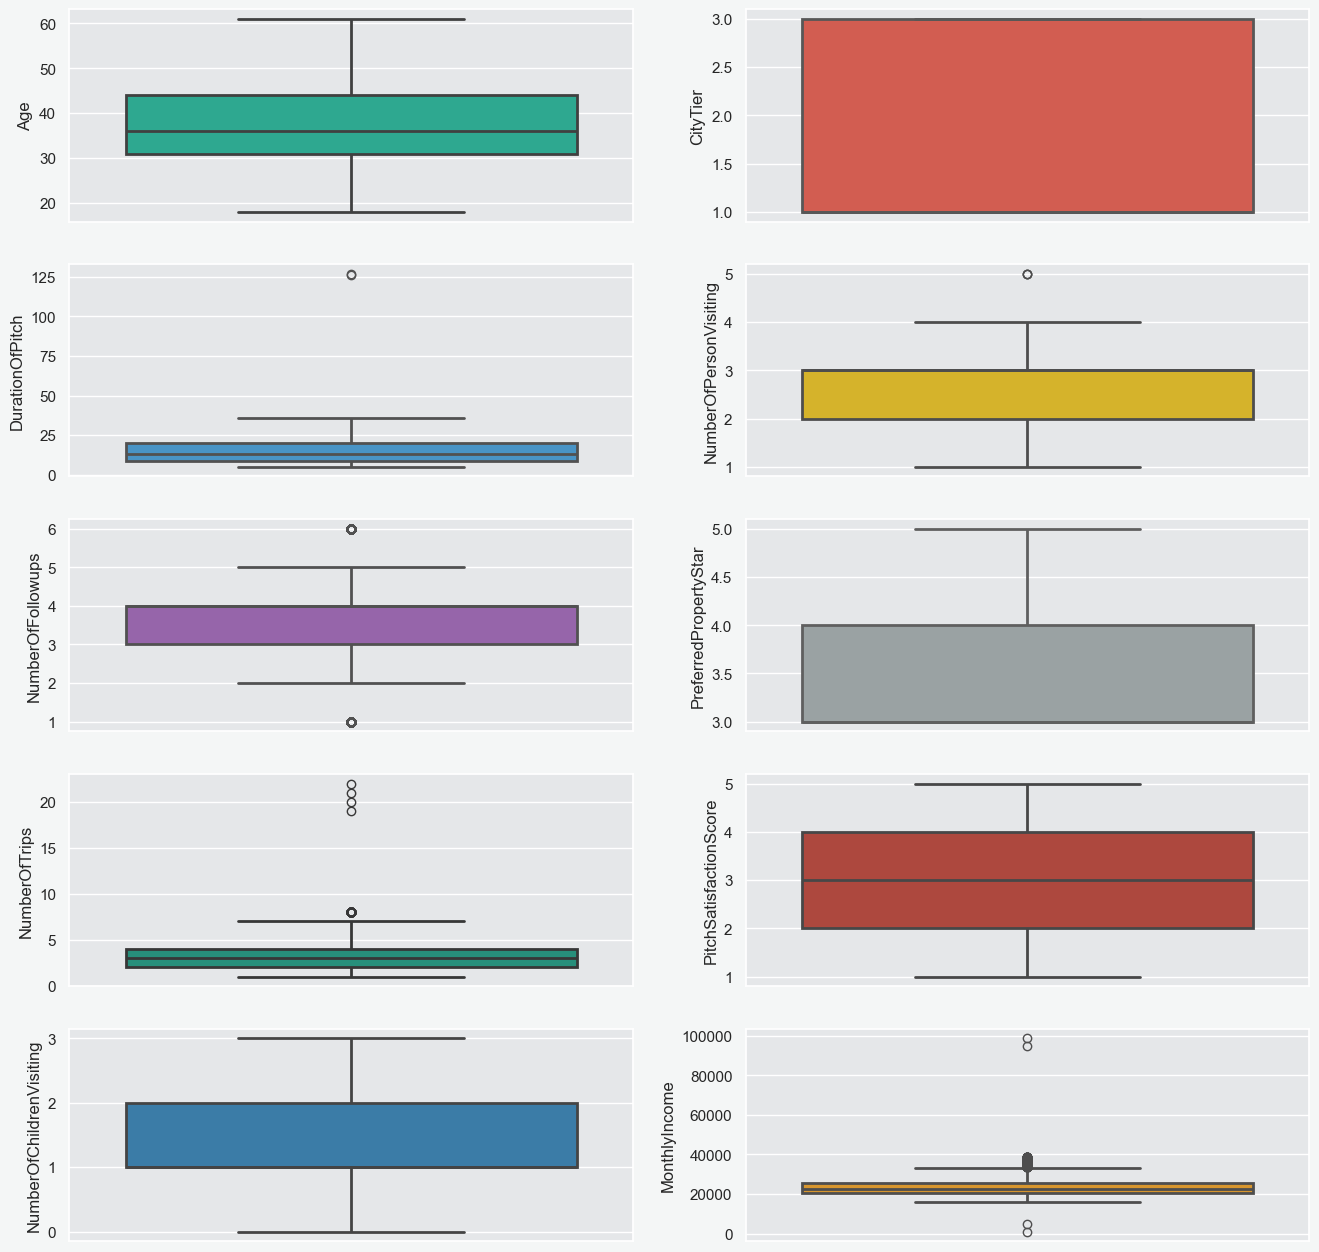

In [10]:
plt.figure(figsize=(16, 16))
for i in range (0, len(numeric)):
  plt.subplot(math.ceil(len(numeric)/2), 2, i+1)
  sns.boxplot(data=df, y=numeric[i], linewidth=2, orient='v', color = colors[i])

Based on boxplot there is outlier in column DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips, and MonthlyIncome.

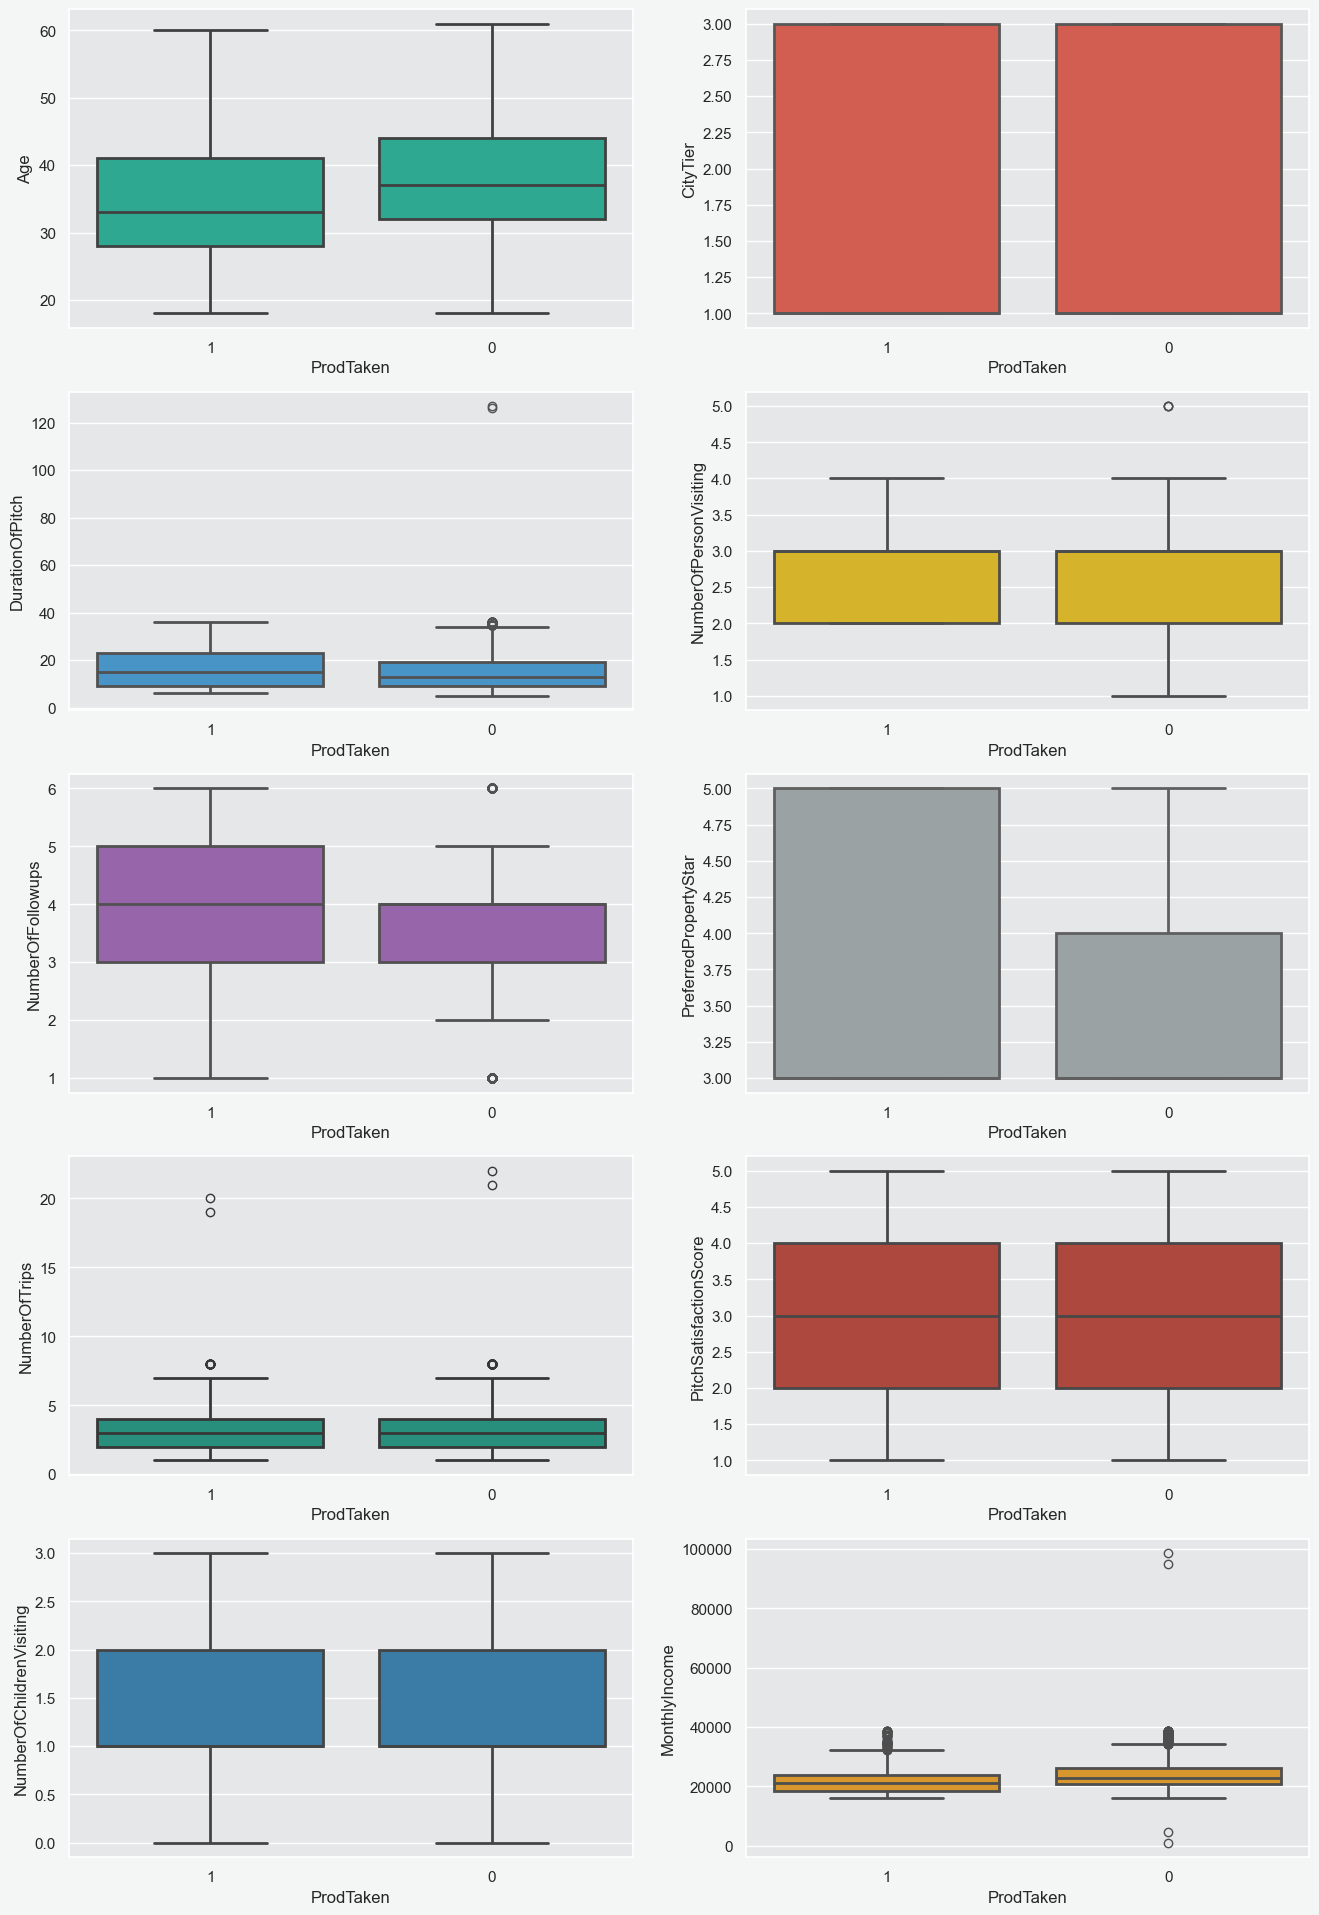

In [11]:
plt.figure(figsize=(16, 24))
for i in range (0, len(numeric)):
  plt.subplot(math.ceil(len(numeric)/2), 2, i+1)
  sns.boxplot(data=df, y=numeric[i], x='ProdTaken',  linewidth=2, orient='v', color = colors[i])

There is some different from ProdTaken or not in column DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar and MonthlyIncome.
- **DurationOfPitch**: The duration of the pitch is slightly longer for those who took the product compared to those who didn't, but the difference is not substantial.
- **NumberOfPersonVisiting**: The number of persons visiting is slightly higher for those who took the product, with a few more outliers in the group that didn't take the product.
- **NumberOfFollowups**: Customers who took the product had more follow-ups on average, indicating that follow-ups might be a significant factor in product adoption.
- **PreferredPropertyStar**: There is a slight tendency for customers who took the product to prefer higher-star properties.
- **MonthlyIncome**: The low average MonthlyIncome slightly impacts the decision to take the product.

For the other columns, there are no significant differences.

#### Categorical

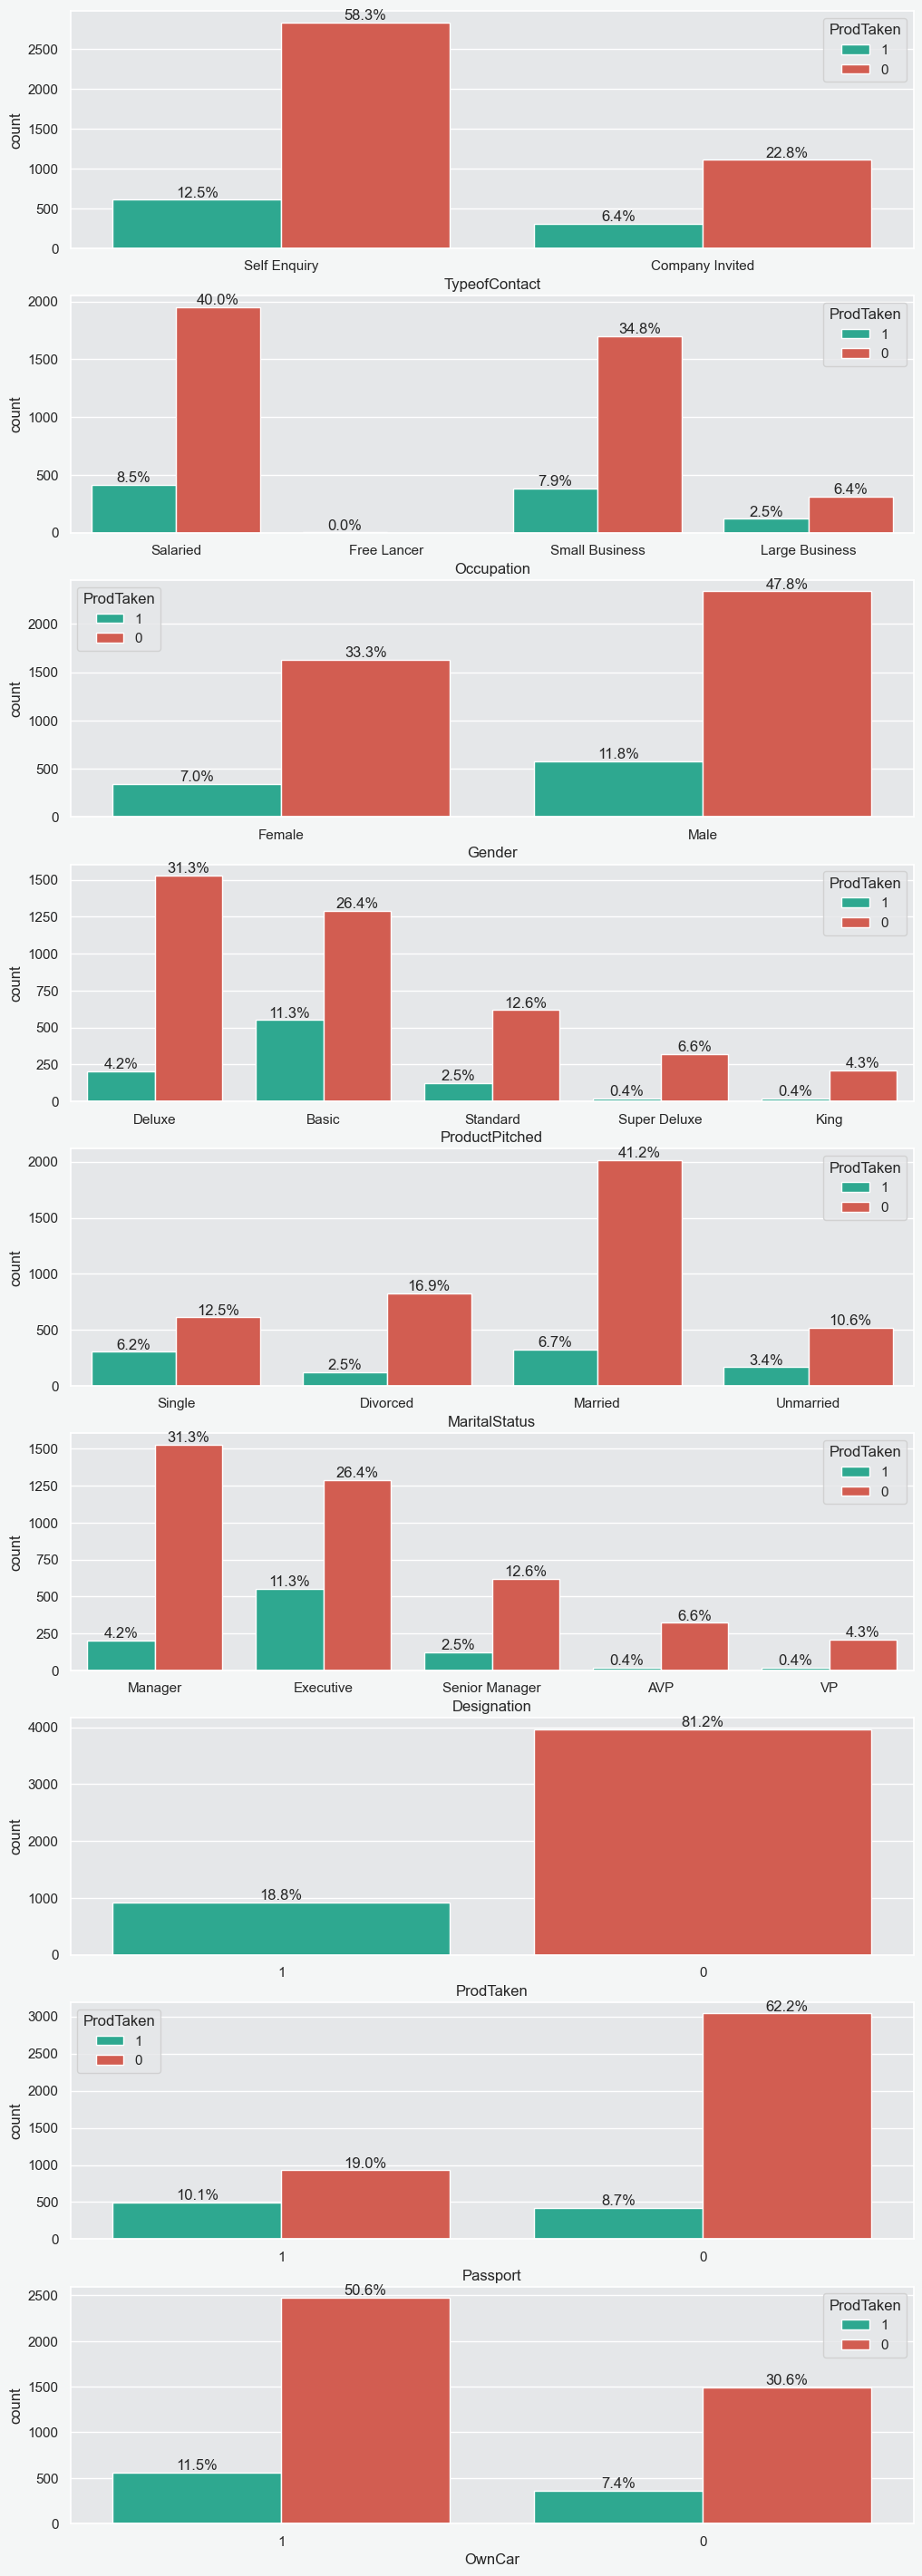

In [12]:
plt.figure(figsize=(12, 36))
for i in range (0, len(categoric)):
  plt.subplot(math.ceil(len(categoric)/1), 1, i+1)
  ax = sns.countplot(data=df, x=categoric[i], hue='ProdTaken')

  for c in ax.containers:
    labels = [f'{h/df[categoric[i]].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

There is a notable difference in the ratio of ProdTaken across some columns, particularly in ProductPitched and Designation. For **ProductPitched**, the Basic Product has the highest ProdTaken rate, significantly higher than the other products. In **Designation**, most customers hold an Executive position, which is significantly higher than other designations.

### Multivariate Analysis

In [13]:
numeric.append('ProdTaken')
numeric

['Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome',
 'ProdTaken']

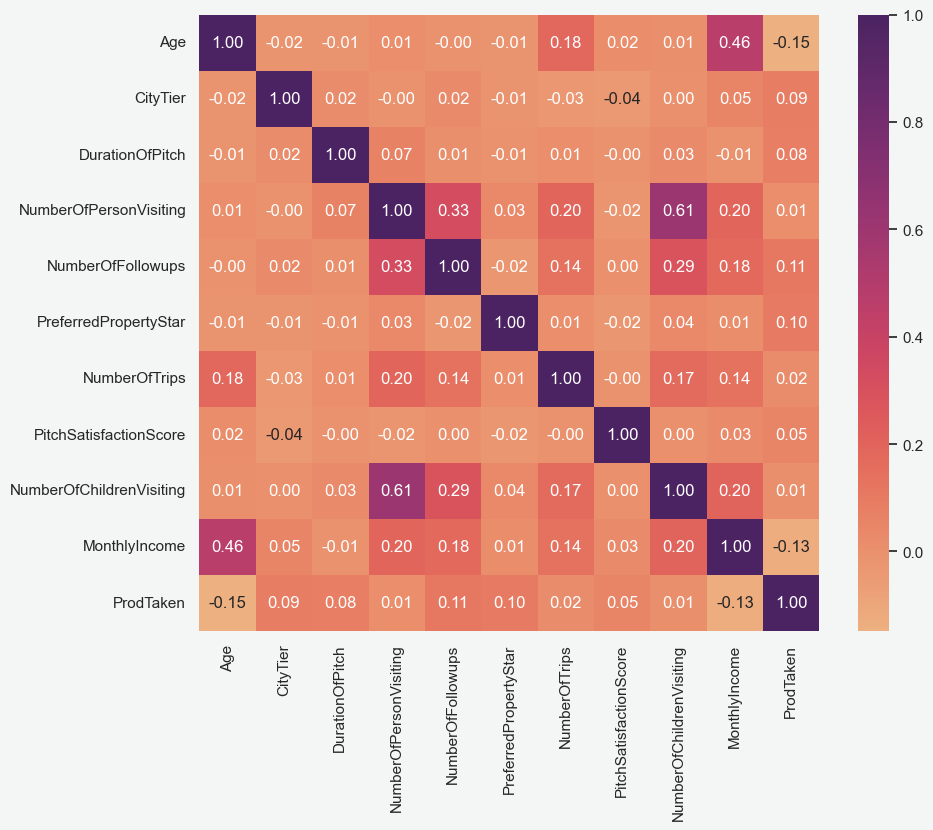

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric].corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

Based on the correlation matrix, we can conclude the following:

- There is a strong positive correlation (0.61) between the NumberOfPersonVisiting and the NumberOfChildrenVisiting, indicating that as the number of persons visiting increases, the number of children visiting also tends to increase.
- There is a moderate positive correlation (0.46) between Age and MonthlyIncome, suggesting that older customers generally have higher monthly incomes.
- There is a moderate positive correlation (0.33) between the NumberOfFollowups and the NumberOfPersonVisiting, meaning that as the number of follow-ups increases, the number of persons visiting also tends to increase.
- There is only a small correlation between ProdTaken and other columns.

---
## **Business Insight**
---

### Purchase Rate

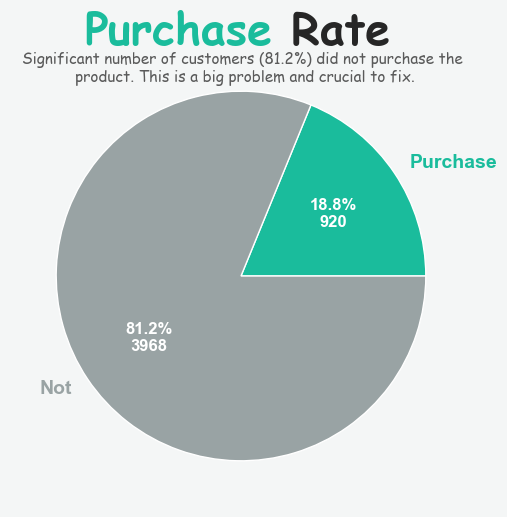

In [15]:
takenCount = df['ProdTaken'].value_counts().values
total = df['ProdTaken'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pieProd = plt.pie([takenCount[1], takenCount[0]], 
                                  labels=['Purchase', 'Not'],
                                  colors=[colors[0], colors[5]],
                                  autopct=fmt)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pieProd, color='white', fontweight='bold')
plt.setp(texts, fontweight=600, fontsize=14)
text = ax.text(-0.85, 1.25, 'Purchase', fontsize=32, weight='semibold', family='cursive', color=colors[0])
text = ax.annotate(" Rate", xycoords=text, xy=(1, 0), fontsize=32, weight='semibold', family='cursive', verticalalignment="bottom")
plt.text(0.02, 1.05, 'Significant number of customers (81.2%) did not purchase the \nproduct. This is a big problem and crucial to fix.', fontsize=11, family='cursive', ha='center').set_alpha(.75)  

plt.show()

**Insight**
- A significant number of customers (81.2%) did not purchase the product. This may be because the target customers do not align with the product.

**Recommendation**
- Understanding the customers' needs and reasons is crucial so we can identify and address their problems effectively.

### Product Pitched 

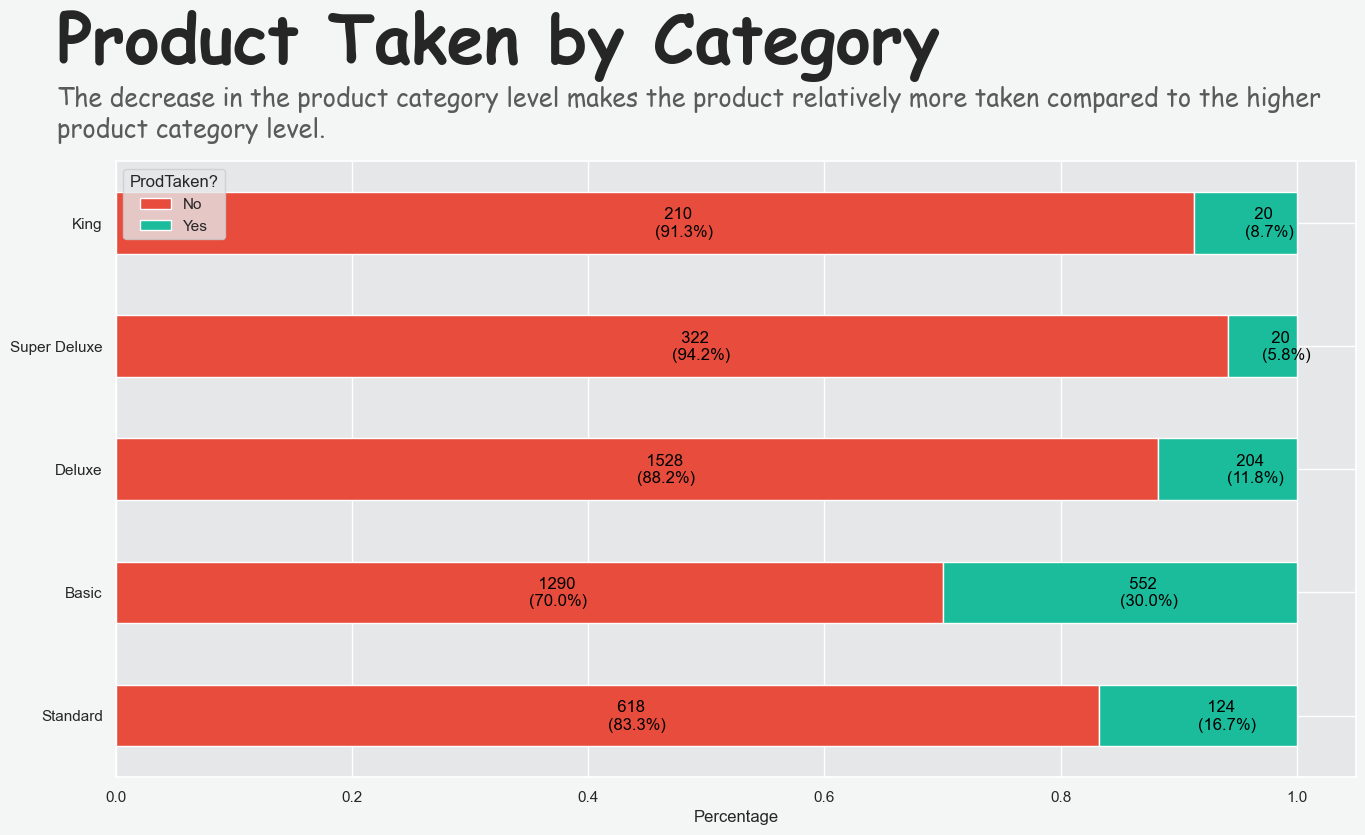

In [16]:
productPitched_percentage = pd.crosstab(index=df['ProductPitched'],
                        columns=df['ProdTaken'], 
                        normalize="index")

productPitched = pd.crosstab(index=df['ProductPitched'],
                        columns=df['ProdTaken'])

sorted_ProductPitched = ['Standard', 'Basic', 'Deluxe', 'Super Deluxe', 'King']
productPitched_percentage.index = pd.Categorical(productPitched_percentage.index, sorted_ProductPitched)
productPitched_percentage = productPitched_percentage.sort_index()
productPitched.index = pd.Categorical(productPitched.index, sorted_ProductPitched)
productPitched = productPitched.sort_index()

productPitched_percentage.plot(kind='barh', 
                        stacked=True, 
                        figsize=(16, 8),
                        color=[colors[1], colors[0]])

for n, x in enumerate([*productPitched.index.values]):
    for (proportion, count, y_loc) in zip(productPitched_percentage.loc[x],
                                          productPitched.loc[x],
                                          productPitched_percentage.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)
        
plt.legend(['No', 'Yes'], title="ProdTaken?", loc='upper left')
plt.xlabel('Percentage')
plt.text(-0.05, 5.3, 'Product Taken by Category', fontsize=48, weight='semibold', family='cursive')
plt.text(-0.05, 4.7, 'The decrease in the product category level makes the product relatively more taken compared to the higher \nproduct category level.', fontsize=18, family='cursive').set_alpha(.75)      

plt.show()

**Insight**
- Majority of customers did not take the product.
- The **Basic category** has the largest percentage of "Yes" responses (30%), showing relatively higher interest compared to other categories.
- The **Super Deluxe** category has the highest percentage of "No" responses (94.2%), indicating the lowest interest among the categories.
- Two of the highest categories (Super Deluxe and King) have the lowest Product Taken.

**Recommendation**
- Understanding the reasons behind the higher interest in the 'Basic' category could provide insights for improving product offerings and reducing marketing costs.
- Marketing strategies or product feature might need to be reassessed, especially for the "Super Deluxe" and "King" categories.

### Number of Followups 

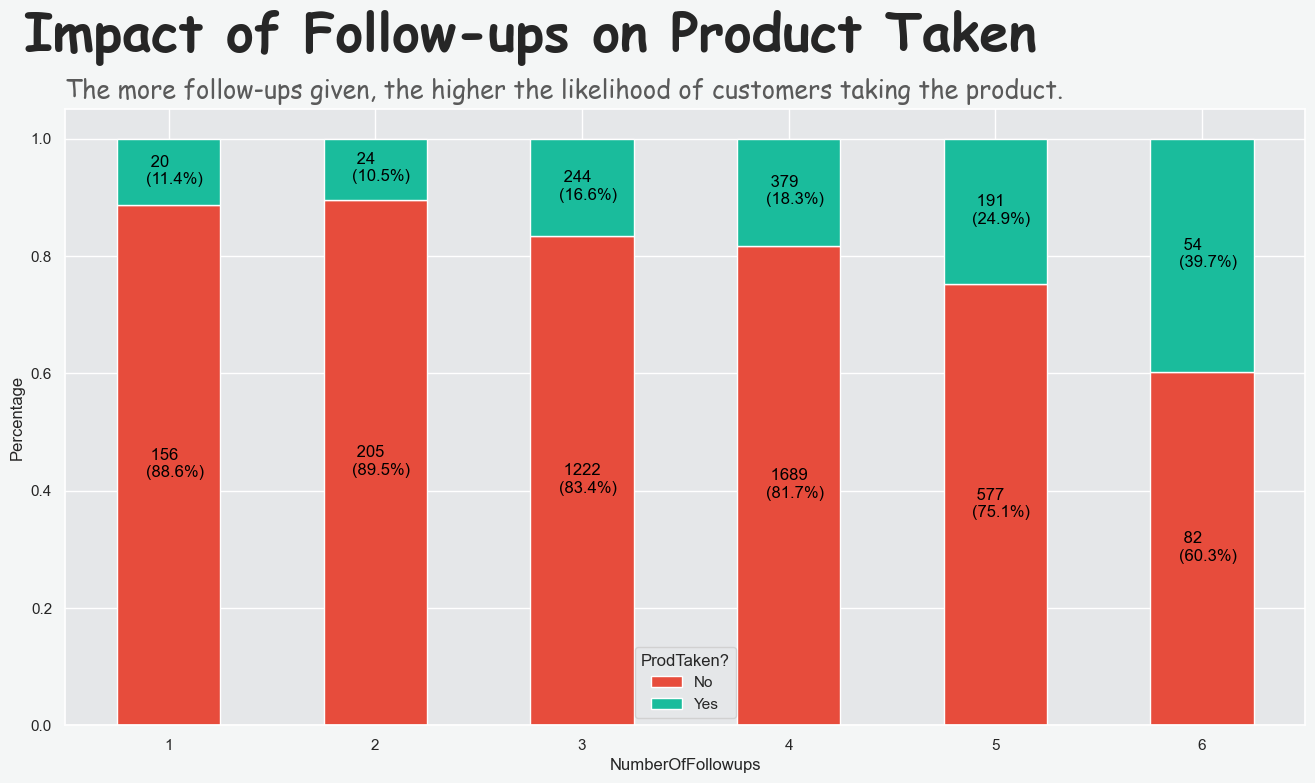

In [17]:
NumberOfFollowups_percentage = pd.crosstab(index=df['NumberOfFollowups'],
                        columns=df['ProdTaken'], 
                        normalize="index")

NumberOfFollowups = pd.crosstab(index=df['NumberOfFollowups'],
                        columns=df['ProdTaken'])

NumberOfFollowups_percentage.index = NumberOfFollowups_percentage.index.astype(int)

NumberOfFollowups_percentage.plot(kind='bar', 
                        stacked=True, 
                        figsize=(16, 8),
                        color=[colors[1], colors[0]])
for n, x in enumerate([*NumberOfFollowups.index.values]):
    for (proportion, count, y_loc) in zip(NumberOfFollowups_percentage.loc[x],
                                          NumberOfFollowups.loc[x],
                                          NumberOfFollowups_percentage.loc[x].cumsum()):
                
        plt.text(y=(y_loc - proportion) + (proportion / 2)-0.02,
                 x=n - 0.11,
                 s=f' {count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)
        
plt.legend(['No', 'Yes'], title="ProdTaken?", loc='best')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.text(-0.7, 1.15, 'Impact of Follow-ups on Product Taken', fontsize=38, weight='semibold', family='cursive')
plt.text(-0.5, 1.07, 'The more follow-ups given, the higher the likelihood of customers taking the product.', fontsize=18, family='cursive').set_alpha(.75)      

plt.show()

### Insight
- More follow-ups enhance the likelihood of customers taking the product. However, this is not efficient because it also increases marketing costs.

### Recommendation
- An effective follow-up strategy is crucial. We need to identify the best follow-up strategy to limit the number of follow-ups and reduce marketing costs incurred by sales personnel.

### Number of Person Visiting

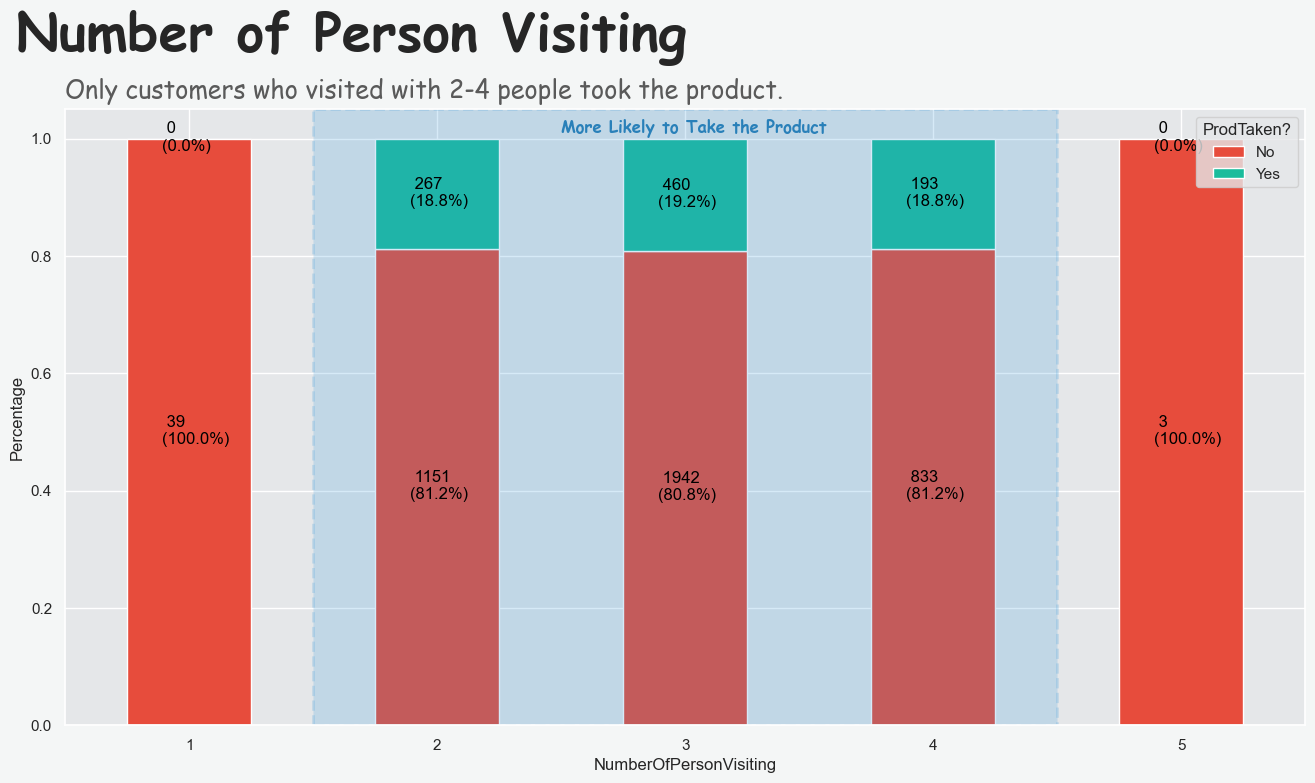

In [18]:
NumberOfPerson_percentage = pd.crosstab(index=df['NumberOfPersonVisiting'],
                        columns=df['ProdTaken'], 
                        normalize="index")

NumberOfPerson = pd.crosstab(index=df['NumberOfPersonVisiting'],
                        columns=df['ProdTaken'])

NumberOfPerson_percentage.index = NumberOfPerson_percentage.index.astype(int)

NumberOfPerson_percentage.plot(kind='bar', 
                        stacked=True, 
                        figsize=(16, 8),
                        color=[colors[1], colors[0]])
for n, x in enumerate([*NumberOfPerson.index.values]):
    for (proportion, count, y_loc) in zip(NumberOfPerson_percentage.loc[x],
                                          NumberOfPerson.loc[x],
                                          NumberOfPerson_percentage.loc[x].cumsum()):
                
        plt.text(y=(y_loc - proportion) + (proportion / 2)-0.02,
                 x=n - 0.11,
                 s=f' {count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)
        
plt.legend(['No', 'Yes'], title="ProdTaken?", loc='best')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.text(-0.7, 1.15, 'Number of Person Visiting', fontsize=38, weight='semibold', family='cursive')
plt.text(-0.5, 1.07, 'Only customers who visited with 2-4 people took the product.', fontsize=18, family='cursive').set_alpha(.75)      
plt.axvspan(0.5, 3.5, color=colors[2], alpha=0.2, linestyle='--', linewidth=2)
plt.text(1.5, 1.01, 'More Likely to Take the Product', fontsize=12, weight='semibold', family='cursive', color=colors[8])

plt.show()

**Insight:**
- Only customers who visited with 2-4 people took the product.

**Recommendation:**
- Understanding why customers who visited with 2-4 people took the product, while those who visited with 1 or 5 people did not, is crucial for improving marketing strategies.

### Preferred Property Star

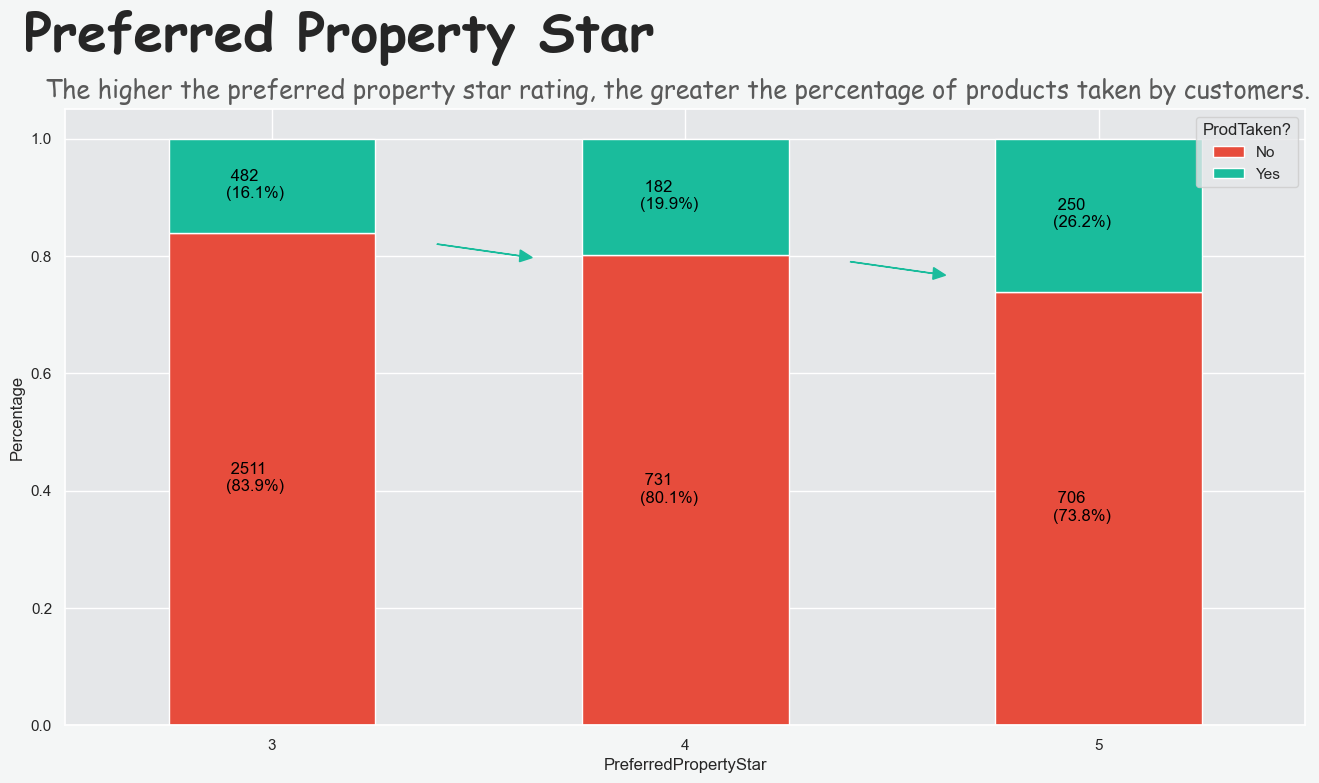

In [19]:
PreferredPropertyStar_percentage = pd.crosstab(index=df['PreferredPropertyStar'],
                        columns=df['ProdTaken'], 
                        normalize="index")

PreferredPropertyStar = pd.crosstab(index=df['PreferredPropertyStar'],
                        columns=df['ProdTaken'])

PreferredPropertyStar_percentage.index = PreferredPropertyStar_percentage.index.astype(int)

PreferredPropertyStar_percentage.plot(kind='bar', 
                        stacked=True, 
                        figsize=(16, 8),
                        color=[colors[1], colors[0]])
for n, x in enumerate([*PreferredPropertyStar.index.values]):
    for (proportion, count, y_loc) in zip(PreferredPropertyStar_percentage.loc[x],
                                          PreferredPropertyStar.loc[x],
                                          PreferredPropertyStar_percentage.loc[x].cumsum()):
                
        plt.text(y=(y_loc - proportion) + (proportion / 2)-0.02,
                 x=n - 0.11,
                 s=f' {count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)
        
plt.legend(['No', 'Yes'], title="ProdTaken?", loc='best')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.text(-0.6, 1.15, 'Preferred Property Star', fontsize=38, weight='semibold', family='cursive')
plt.text(-0.55, 1.07, 'The higher the preferred property star rating, the greater the percentage of products taken by customers.', fontsize=18, family='cursive').set_alpha(.75)      
plt.arrow(0.4, 0.82, 0.2, -0.02, 
          head_width = 0.02,
          width = 0.0005,
          ec =colors[0])
plt.arrow(1.4, 0.79, 0.2, -0.02, 
          head_width = 0.02,
          width = 0.0005,
          ec =colors[0])

plt.show()

**Insight:**
- As the preferred property star rating increases, so does the likelihood of customers taking the product.
- However, across all property star ratings, the majority of customers (>70%) still do not take the product.

**Recommendation:**
- Understanding why customers prefer higher star ratings is crucial for refining and enhancing marketing strategies.
- After gaining this understanding, implement targeted marketing campaigns and offers that are more appropriate for these customer preferences.

### Designation

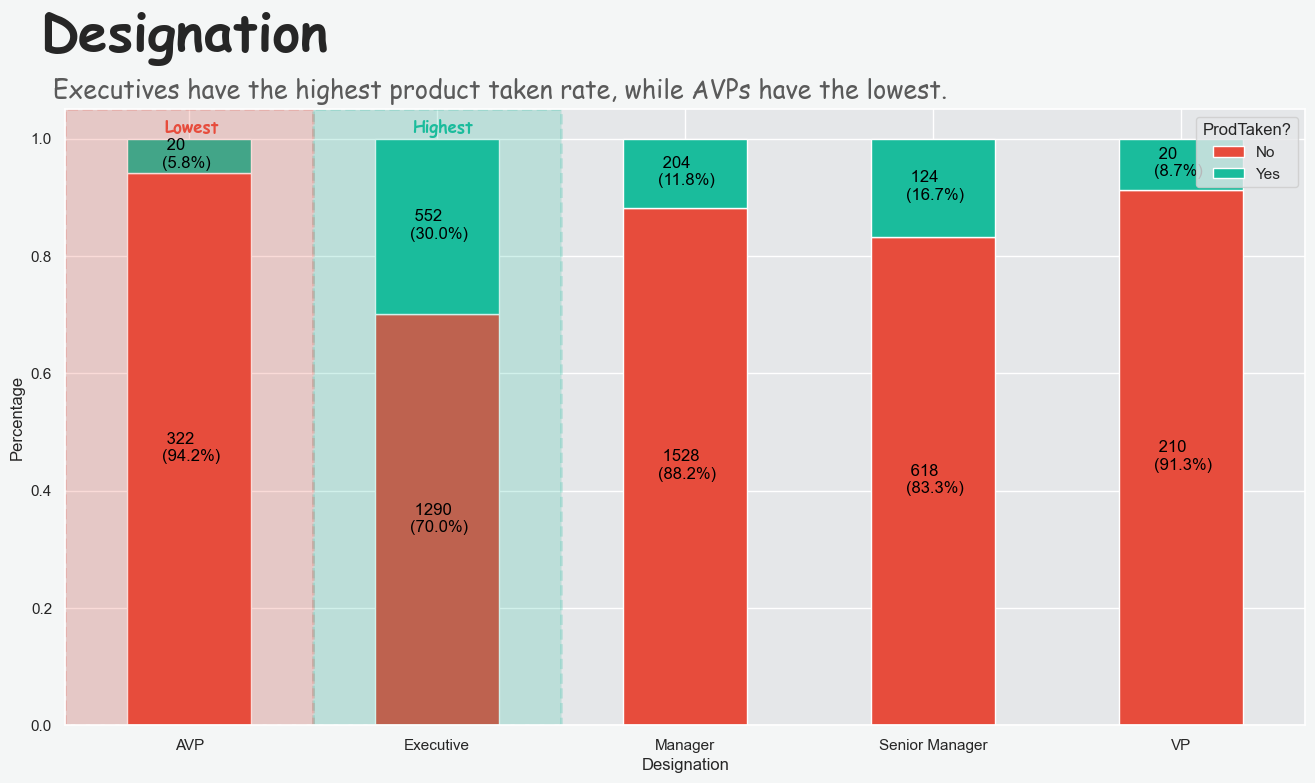

In [20]:
Designation_percentage = pd.crosstab(index=df['Designation'],
                        columns=df['ProdTaken'], 
                        normalize="index")

Designation = pd.crosstab(index=df['Designation'],
                        columns=df['ProdTaken'])

Designation_percentage.plot(kind='bar', 
                        stacked=True, 
                        figsize=(16, 8),
                        color=[colors[1], colors[0]])
for n, x in enumerate([*Designation.index.values]):
    for (proportion, count, y_loc) in zip(Designation_percentage.loc[x],
                                          Designation.loc[x],
                                          Designation_percentage.loc[x].cumsum()):
                
        plt.text(y=(y_loc - proportion) + (proportion / 2)-0.02,
                 x=n - 0.11,
                 s=f' {count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)
        
plt.legend(['No', 'Yes'], title="ProdTaken?", loc='best')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.text(-0.6, 1.15, 'Designation', fontsize=38, weight='semibold', family='cursive')
plt.axvspan(0.5, 1.5, color=colors[0], alpha=0.2, linestyle='--', linewidth=2)
plt.text(-0.1, 1.01, 'Lowest', fontsize=12, weight='semibold', family='cursive', color=colors[1])
plt.axvspan(-0.5, 0.5, color=colors[1], alpha=0.2, linestyle='--', linewidth=2)
plt.text(0.9, 1.01, 'Highest', fontsize=12, weight='semibold', family='cursive', color=colors[0])
plt.text(-0.55, 1.07, 'Executives have the highest product taken rate, while AVPs have the lowest.', fontsize=18, family='cursive').set_alpha(.75)      

plt.show()

**Insight:**
- The designation of customers significantly impacts the likelihood of them taking the product.
- Executives show the highest product take-up rate, with 30.0% (552 out of 1842) taking the product.
- Senior Managers and Managers also show higher take-up rates compared to AVP and VP, with 16.7% and 11.8% respectively.
- AVP and VP have the lowest take-up rates at 5.8% and 8.7%, respectively.

**Recommendation:**
- Focus marketing efforts on Executives, Senior Managers, and Managers, who show a higher likelihood of taking the product. Tailor campaigns to address their specific needs and preferences.
- Investigate why AVPs and VPs have lower product adoption rates to refine and enhance marketing strategies.
- Develop different marketing approaches based on the unique characteristics and needs of each designation to improve overall product adoption.